# Text Generation

- Deep-learning Language model
- Generative model
- Based on Chp 8 Deep Learning with Python
- Character-based text generative model (using LSTM)

In [1]:
import keras
import numpy as np

In [2]:
## Download texts
path = keras.utils.get_file('nietzsche.txt',
                           origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus Length:', len(text))

Corpus Length: 600893


In [3]:
## Creating sequences for training
maxlen = 60 # 60 characters as one sequence at a time
step = 3 # sample new sequence every 3 characters, shift size
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen]) # context
    next_chars.append(text[i + maxlen]) # target word
print('Number of sequences:', len(sentences))

Number of sequences: 200278


In [4]:
## Creating char mapping dictionary
chars = sorted(list(set(text))) # dict of chars
print('Unique characters:', len(chars))
# create a map of each character and its corresponding numeric index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 57


In [5]:
## Vectorizing sequences
print('Vectorization...')
## one-hot encoding for all characters
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]]=1 # i-th sentence, t-th character, one-hot position
    y[i, char_indices[next_chars[i]]]=1 # i-th sentence, the target word one-hot position

Vectorization...


In [6]:
# ## Building Network
# from keras import layers
# model = keras.models.Sequential()
# model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
# model.add(layers.Dense(len(chars), activation='softmax'))

# ## Model configuration
# optimizer = keras.optimizers.RMSprop(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [7]:
## After the training, a function to sample the next char given the model prediction
def sample(preds, temperature = 1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)/temperature
    exp_preds = np.exp(preds)
    preds = exp_preds/np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [8]:
## Model Training
# history = model.fit(x, y, batch_size=128, epochs = 60)


In [9]:
## Save model
# model.save('../data/text-gen-lstm-nietzsche.h5')


In [10]:
# print(history.history.keys())
# loss_values = history.history['loss']
# epochs = range(1, len(loss_values)+1)

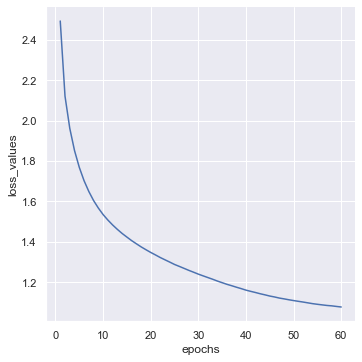

In [11]:
import seaborn as sns
import pandas as pd
import pickle
%matplotlib inline

## load previous saved df
pickle_in = open("../data/text-gen-lstm-nietzschet-history.pickle","rb")
hist_df = pickle.load(pickle_in)

#hist_df=pd.DataFrame(list(zip(epochs, loss_values)), columns=['epochs','loss_values'])
sns.set(style='darkgrid')
sns.relplot(data=hist_df,x='epochs', y='loss_values', kind='line')

In [12]:
# import pickle
# pickle_out = open("../data/text-gen-lstm-nietzschet-history.pickle","wb")
# pickle.dump(hist_df, pickle_out)
# pickle_out.close()

In [13]:
## Load Saved Model
## No need to create and compile the model first?
model = keras.models.load_model('../data/text-gen-lstm-nietzsche.h5')

In [14]:
## Generating Texts

import random
import sys


start_index = random.randint(0, len(text)-maxlen-1)
generated_text = text[start_index:start_index+maxlen]

In [15]:
print('--Generating with seed: "'+ generated_text + '"')
for temperature in [0.2, 0.5, 1.0, 1.2]:
    print('----- temperature:', temperature)
    sys.stdout.write(generated_text)
    # generate 400 chars after the seed text
    for i in range(200):
        # one-hot encoding seed text
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]]=1 # given the sample text, t-th char, one-hot position
        
        preds = model.predict(sampled, verbose=0)[0] # get output prob distribution
        next_index = sample(preds, temperature) # choose the char based on temperature
        next_char = chars[next_index]
        
        generated_text += next_char # append the new char
        generated_text = generated_text[1:] # get rid of the first char
        sys.stdout.write(next_char)
    

--Generating with seed: "ely before the man of the great current he
stands all the co"
----- temperature: 0.2
ely before the man of the great current he
stands all the co

mmand-

-inter

pentat

y of

 the 

most 

reffir

ed t

o hav

e and

 the
f

act th

at the

 even

 to t

he ex

istenc

e of t

he sen

ses it

 is a 

sort o

f suc

h an


advis

tonce-

-with 

all th

e same

 a new

 sudde

r to h

im al

so the


last 

that ----- temperature: 0.5
e--with all the same a new sudder to him also the
last that t

he can

 be ev

er tha

t thes

e poin

t of d

istrus

tful a

nd
sub

lim th

at is 

the se

nse of

 the s

oul as

 i pro

doun a

nd the

 soul 

is the

re
ind

uperem

. the 

greate

st and

 weak;

 how g

eneral

ly and

 the s

pirit,

 speci

alike


t----- temperature: 1.0
reatest and weak; how generally and the spirit, specialike
to hor

dwich 

in our

 of wh

o muck

 whow 

itself

 elum

vasi

on

al erv

eders


and mu

st bes

e, a g

oper d

elight

 who d

eex to

ous, t

he spi

rit of


.
a
m

aveaks

. bot 

even m

un'est

!e"--t

he hun

dage a

nd suc

h gren

iness 

in thi

ng s----- temperature: 1.2
t even mun'est!e"--the hundage and such greniness in thing som

e dist

iction

, is i

f
gold

 and a

 chrim

ed beg

nezess

ive, a

nd wit

h unch

ant a 

call
n

o ross

 passi

on and

 of th

e look

ing of

 his p

roposa

rity o

verpto

rs, al

so,
in

 profo

umpys,

 would

 else 

dreame

sture 

in the

 a del